# 01 Exploratory

The purpose of this notebook is to investigate the data.

## Project task

Mod 3 project task is to create a model that classifies a water pump as fully functional, in need of repairs, or failed. We are to use the waterpump features (data of installation, who installed, etc) to do this.

## Import libraries and data

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Model creation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# store training features and labels in dataframes
vals = pd.read_csv('../../training_set_values')
labels = pd.read_csv('../../training_set_labels')

In [3]:
vals.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
labels.head()

,Unnamed: 0,id,status_group
0,0,69572,functional
1,1,8776,functional
2,2,34310,functional
3,3,67743,non functional
4,4,19728,functional


The data is already split into features and labels, but for initial data exploration I want to combine them into one dataframe.

In [5]:
labels.drop('Unnamed: 0', axis=1, inplace=True)
df = labels.merge(vals, on='id', how='outer')

In [6]:
df.head()

,id,status_group,Unnamed: 0,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Now I can drop the id column and Unnamed since the observations are aligned properly.

In [7]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Now I can begin to investigate the data. First I want to check the shape so I can see how many observations I am working with.

In [9]:
df.shape

(59400, 40)

Almost 60,000 rows, that means I will have a lot of data to train a model with but also enough to accurately test the model. I also need to check datatypes for the features.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
status_group             59400 non-null object
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object


The majority of the data seems to be categorical but I will have to check into that more. Only a select few are inherently numeric. There are a few columns that are missing values, but only scheme_name is missing a lot. Since scheme_managment provides the close to the same information according to the data documentation, I will drop scheme_name.

In [11]:
df.drop('scheme_name', axis=1, inplace=True)

In [12]:
df.isna().sum()

status_group                0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

'scheme_name' is dropped and now there are only 6 columns missing data. Before I deal with those missing data values I will need to perform a train_test_split to prevent data leakage. For now I am going to explore the available data a little more as is before filling missing values.

In [13]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The class 'functional needs repair' is extremely lower than the other two classes. I will have to keep that in mind when creating the model and oversample that class.

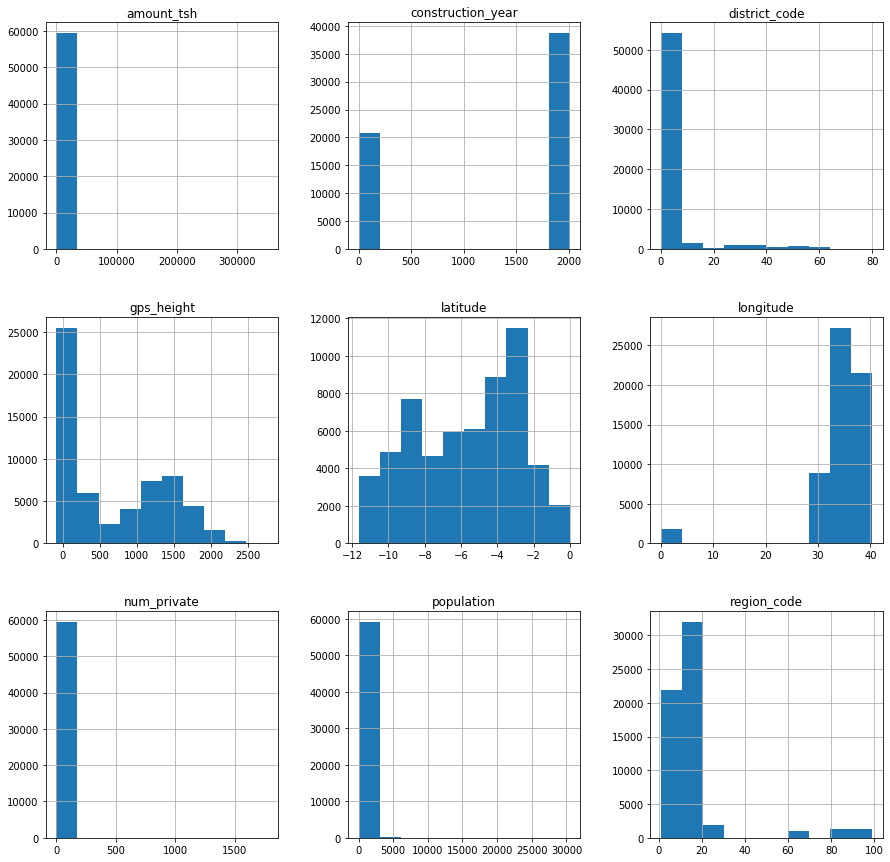

In [14]:
df.hist(figsize=(15,15));

So only nine of the features are actually numeric, all of the other's are objects. I'm curious why the construction_year column has so many low values, it doesn't seem like it should ever have a value of 0. Let's look into that more.

In [15]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

Over 20,000 of the construction_year values are 0. That could be an issue when creating the model as those are basically missing values. I wonder how I could impute those. Just a side note for when I fill in the missing values for the other categorical columns, I think it would be beneficial to calculate the percentage of each category in that variable and fill a percentage of the missing values with each percentage of the other categories. I actually want to try that now. I don't want to fill those values yet, but I want to investigate those columns more and determine the best way to fill them when I need to.

### Explore missing values

I'll look first at the 'funder' column

In [46]:
df.isna().sum()['funder']

3635

In [58]:
df['funder'].value_counts()

Government Of Tanzania           False
Danida                           False
Hesawa                           False
Rwssp                            False
World Bank                       False
                                 ...  
Tbl                              False
Comune Di Roma                   False
Afriican Reli                    False
Manyovu Agriculture Institute    False
Madra                            False
Name: funder, Length: 1897, dtype: bool

Considering that out of 59,400 observations, 9,084 are a single category, I could probably just fill the missing values with that, but I want to look at it a little more.

In [102]:
len(df[df['funder'] == 'NaN'])

0

That's interesting, 777 of the funder values are 0. I would imagine 0 to be inplace of the missing values, but that only accounts for 777, what about the other missing values? I'm going to check some of the other columns with missing values and see what is used in those.

In [64]:
df.isna().sum()['installer']

3655

In [65]:
df['installer'].value_counts()

DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
NDRDP                        1
Quick win/halmashauri        1
john skwese                  1
RC Msufi                     1
Madra                        1
Name: installer, Length: 2145, dtype: int64

In [66]:
len(df[df['installer'] =='0'])

777

Same amount of values equal to 0 in installer as in funder, I wonder if they are the same indices.

In [70]:
df[df['installer'] == '0'].index == df[df['funder'] == '0'].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Okay so I wonder if I can assume the same for the other columns missing data. subvillage is only missing 371 so probably not that one, but the other ones should be the same.

In [89]:
len(df[df['permit'] == '0'])

0

The other columns have no values of 0. I'm still curious what the missing value value is, but I will have to leave that for now. I'm curious how many rows have any missing values.

In [97]:
len(df[df.isna().any(axis=1)])

11112

I want to select the index with missing values from funder to see what is the placeholder.

In [98]:
missing_funder = df[df.isna()['funder']]

In [100]:
missing_funder.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
34,functional,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
43,non functional,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
47,functional,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
65,non functional,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
71,non functional,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


That's strange, when I checked how many observations had 'NaN' for funder it kept coming back 0

I guess it really doesn't matter what the values are I have to replace them nonetheless. I do want to look into a few of the other columns that I think may impact 'status_group' though. It seems like the majority of the columns have upwards of 2000 categories each, I'm going to have to group some of those together in order to do OneHotEncoding.

### Feature exploration

One feature I think will significantly impact the status of the pump is population. The more people using the pump, the more wear and tear it will undergo and the more likely it will need repairs or be failing althogether. This is my intuitive thinking but I'd like to explore this theory more.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb7a6a7710>]],
      dtype=object)

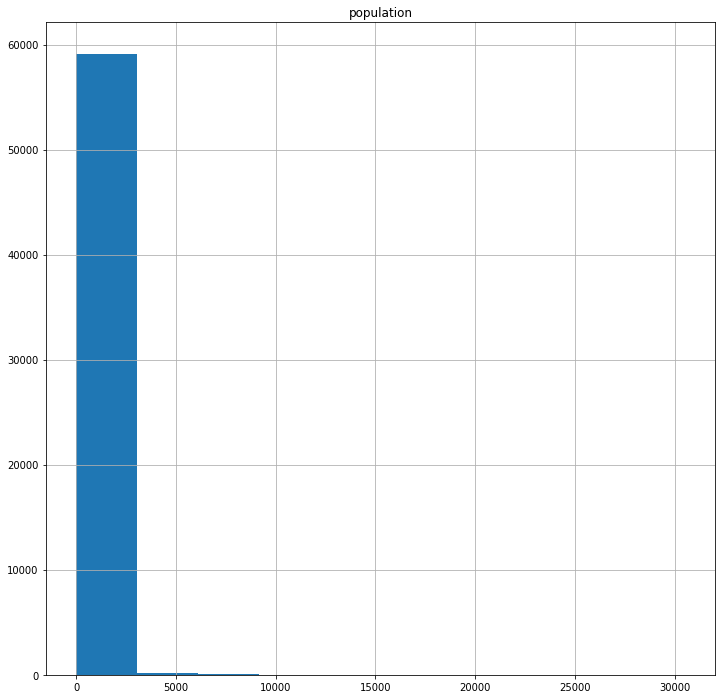

In [113]:
df.hist('population', figsize=(12,12))

In [114]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

More than a third of the population values are 0, and nearly half are either 0 or 1, so perhaps the population data won't give too much insight. The 'management' column may be a good one to look at. The quality of water well management should influence the status of the well.

In [115]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

That's cool this is the first categorical variable I have seen that doesn't have over 1000 categories.

In [116]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

'management_group' column has even fewer categories but I assume is essentially the same information.

In [117]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### Questions

A few questions I have moving forward (more about data science than actual data):
- how to find correlation or supplement measurement for categorical data
- how to group different categories together to allow OneHotEncoding


One thing I have noticed from the data documentation specifically is that a lot of the features give similar information. For example management and management_group both give essentially the same info, management is just a little more specific. But when I get to modeling I won't need that duplicate info. For now I want to continue exploring the individual featueres

In [126]:
df.groupby('status_group').describe()['amount_tsh']

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,461.798235,3889.735284,0.0,0.0,0.0,50.0,350000.0
functional needs repair,4317.0,267.071577,1925.026420,0.0,0.0,0.0,50.0,100000.0
non functional,22824.0,123.481230,1110.120571,0.0,0.0,0.0,0.0,117000.0


The average amount of water available at a given pump is a good indicator of how it is functioning, which makes sense, if a water well is not functioning properly there will be less water available!

In [130]:
df.groupby('status_group').describe()['gps_height']

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,740.131188,724.193683,-90.0,0.0,550.0,1404.0,2628.0
functional needs repair,4317.0,627.607135,648.397850,-51.0,0.0,385.0,1243.0,2770.0
non functional,22824.0,574.464774,642.752316,-59.0,0.0,293.0,1211.0,2627.0


gps_height is the altitude of the well, which I assumes mean how high above sea level. On average it looks like wells at higher sea levels actually function better. I thought it would be the other way around. It's important I keep in mind that the classes in status_group are not well balanced, and that imbalance may impact some of these stats. Also I need to remember to take interactions into account when I start building models.

In [137]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64